# Presentation and Visualization Dashboard: Adults Dataset


To commence our examination of the "Adults" dataset, we will read the data from the following website: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data, hosted by the University of California, Irvine.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
column_names = [
    "age", "workclass", "fnlwgt", "education", "education_num", "marital_status",
    "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss",
    "hours_per_week", "native_country", "income"
]
df = pd.read_csv(url, names=column_names, sep=",\s*", engine="python",na_values='?')

df.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Part1: Exploratory data analysis

### (a) Describe the data
Initially, a comprehensive overview of the data is presented:

In [ ]:
# Display basic information about the dataset
print("Data Description:")
print(df.describe())

# Explore data types, range of values, and missing values
print("\nData Information:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

print(df.shape)

Data Description:
                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  

Data Information:
<class 'pandas.core.frame.

Subsequently, we shall proceed with the removal of rows containing missing values. The decision to undertake this action is based on the relatively limited prevalence of such missing values within the dataset, which comprises more than 32,000 samples. This change will not affect our primary objective, which is to show the fundamental characteristics of each attribute and analyze the correlations existing among them.

In [ ]:
#when we read the data we replaced the '?' values with nan values and now we will
# Remove rows with missing values in any column
df = df.dropna()
print("\nMissing Values:")
print(df.isnull().sum())
print(df.shape)


Missing Values:
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64
(30162, 15)


To visually represent the distribution of each attribute across our dataset, histograms and density plots are generated for each numerical feature, namely: "age", "fnlwgt", "education_num", "capital_gain", "capital_loss" and "hours_per_week".

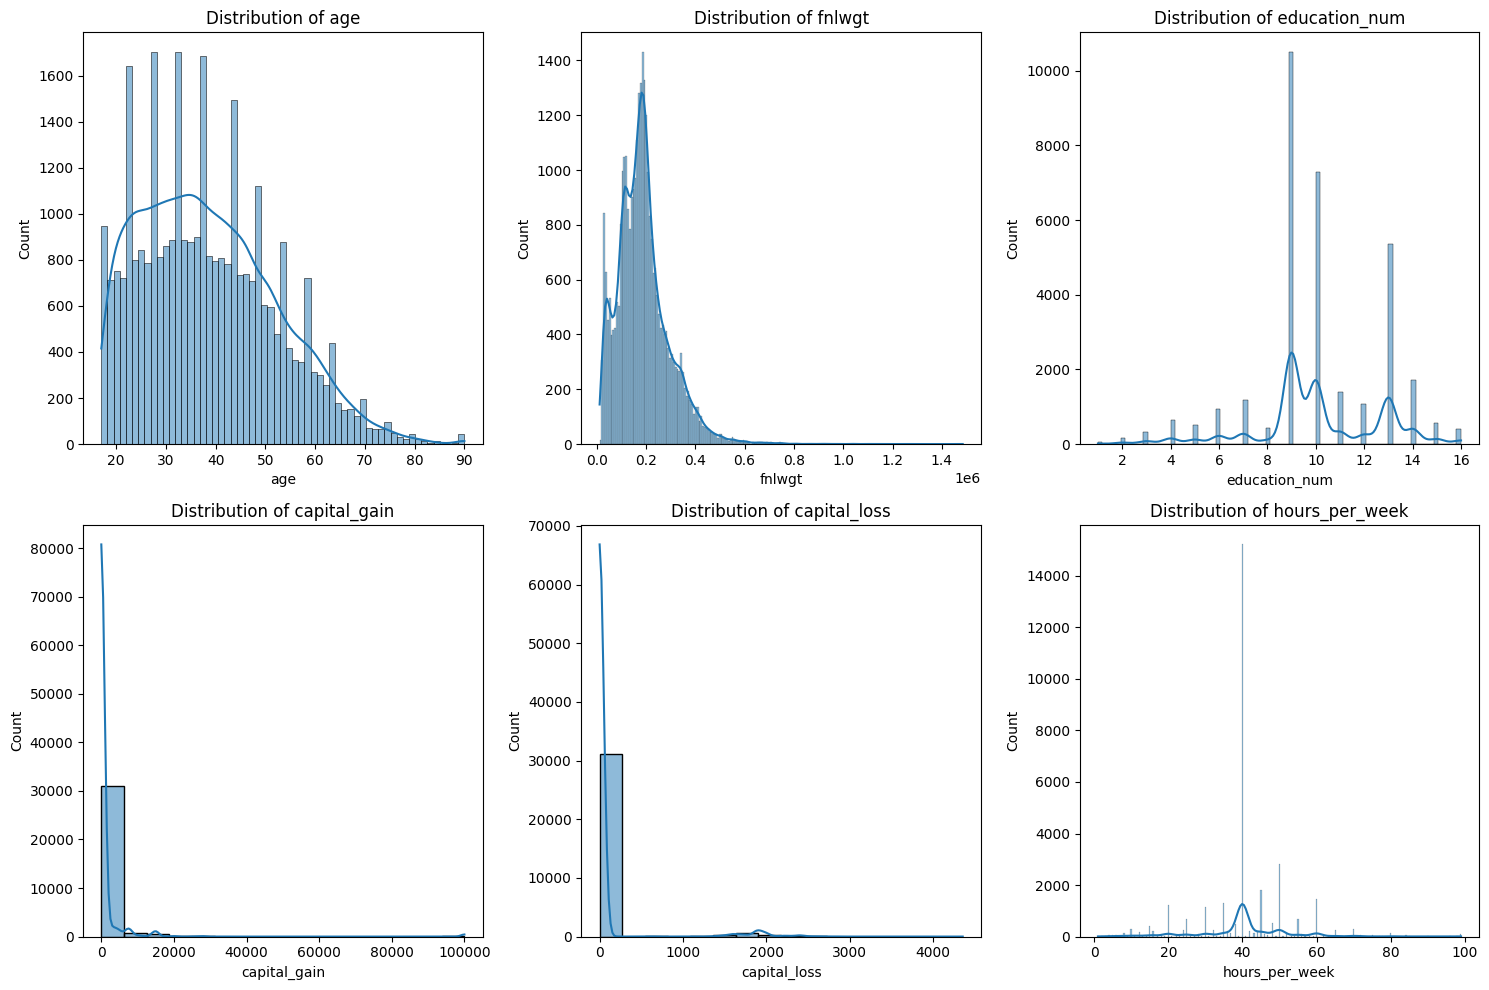

In [ ]:
# Data Distribution
# Create histograms and density plots for numerical features
numerical_features = ["age", "fnlwgt", "education_num", "capital_gain", "capital_loss", "hours_per_week"]

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()


We place a particular emphasis on analyzing the distribution of "age" and "hours_per_week".

1. Age Distribution:
      - Histogram: The age distribution appears to be slightly right-skewed, with a peak in the mid-30s. This suggests that a significant portion of the dataset consists of individuals in their 30s.
      - Density Plot: The density plot confirms the right-skewed nature of the age distribution. It provides a smoother representation of the data distribution.

2. Hours per Week Distribution:

      - Histogram: The distribution of hours worked per week appears to be roughly normally distributed, with a peak around 40 hours per week, which is typical for full-time employment.
      - Density Plot: The density plot supports the approximately normal distribution, with a clear peak at 40 hours per week.

To assess the presence of outliers, boxplots have been generated for the relevant numerical features.

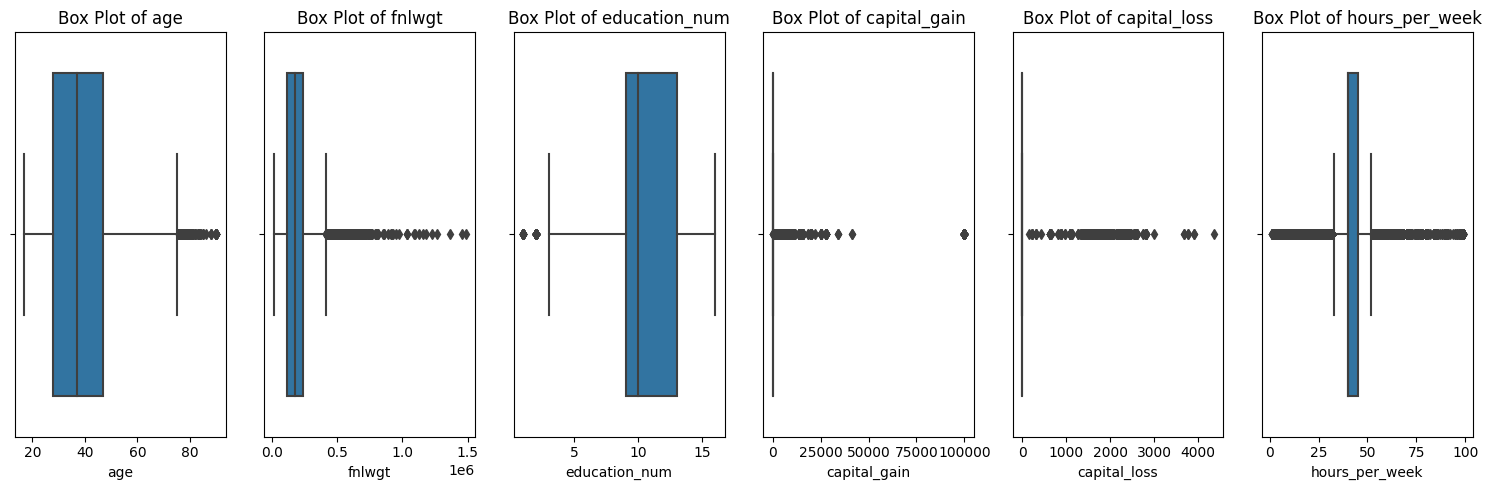

In [ ]:
# Outliers
# Create box plots to identify potential outliers in numerical features
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 6, i)
    sns.boxplot(x=feature, data=df)
    plt.title(f"Box Plot of {feature}")
plt.tight_layout()
plt.show()


1. Age Outliers: The age box plot shows a few outliers on the high end, indicating individuals who are significantly older than the majority of the dataset. These outliers suggest a presence of older individuals.

2. Hours per Week Outliers: The hours per week box plot doesn't reveal clear outliers, suggesting that the distribution of hours worked per week is relatively uniform without extreme values.


Upon observing the distribution of "capital_gain" and "capital_loss," it seems advisable to omit these variables from the Dashboard.  However, during this exploratory analysis, we will still consider them to assess if they provide distinctive value.

Continuing our examination, we turn our attention to the categorical features. Specifically, we are keen on further exploring the "native_country" column to determine its fundamental structure. This involves investigating the distinct native countries present in the dataset, determining the percentage of each country relative to the entire sample, and specifying the percentage of immigrants within the overall dataset.

['United-States' 'Cuba' 'Jamaica' 'India' 'Mexico' 'Puerto-Rico'
 'Honduras' 'England' 'Canada' 'Germany' 'Iran' 'Philippines' 'Poland'
 'Columbia' 'Cambodia' 'Thailand' 'Ecuador' 'Laos' 'Taiwan' 'Haiti'
 'Portugal' 'Dominican-Republic' 'El-Salvador' 'France' 'Guatemala'
 'Italy' 'China' 'South' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands']
Country Counts and Percentages:
                            Count  Percentage
United-States               27504   91.187587
Mexico                        610    2.022412
Philippines                   188    0.623301
Germany                       128    0.424375
Puerto-Rico                   109    0.361382
Canada                        107    0.354751
India                         100    0.331543
El-Salvador                   100    0.331543
Cuba                           92    0.305020
England                        86    0.2851

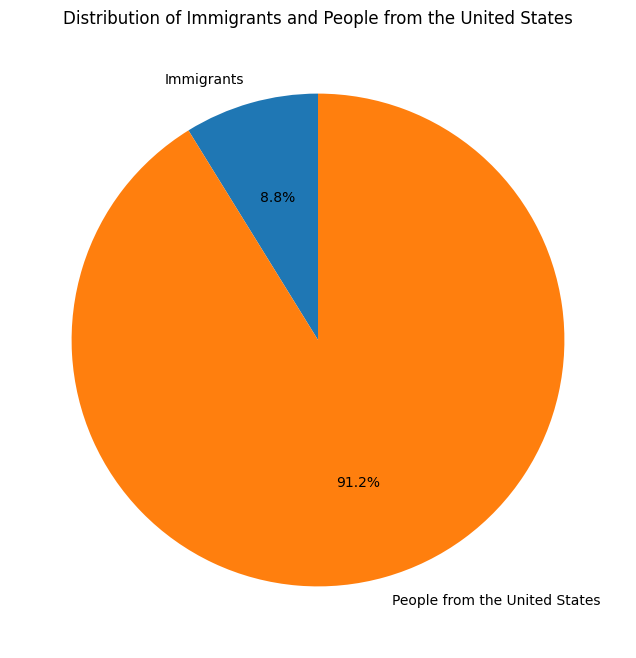

In [ ]:
#Unique values in the "native_country" column:
unique_countries = df['native_country'].unique()
print(unique_countries)


total_entries = len(df)

# Calculate the count and percentage for each country
country_counts = df['native_country'].value_counts()
country_percentages = (country_counts / total_entries) * 100

# Calculate the count and percentage for immigrants (excluding United States)
immigrant_count = total_entries - country_counts['United-States']
immigrant_percentage = (immigrant_count / total_entries) * 100

# Calculate the count and percentage for people from the United States
us_count = country_counts.get('United-States', 0)  # Handle the case where 'United-States' might not be present
us_percentage = (us_count / total_entries) * 100

# Display the results
result_df = pd.DataFrame({
    'Count': country_counts,
    'Percentage': country_percentages
})

print("Country Counts and Percentages:")
print(result_df)

print("\nImmigrant Counts and Percentage:")
print(f"Count: {immigrant_count}, Percentage: {immigrant_percentage:.2f}%")

print("\nPeople from the United States Counts and Percentage:")
print(f"Count: {us_count}, Percentage: {us_percentage:.2f}%")



#PLOT

fig, ax = plt.subplots(figsize=(8, 8))

# Labels for the pie chart
labels = ['Immigrants', 'People from the United States']

# Values for the pie chart
values = [immigrant_percentage, us_percentage]

# Plot the pie chart
ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)

ax.set_title('Distribution of Immigrants and People from the United States')

plt.show()

The data presented in the "native_country" feature appears to be a representative sampling of the overall population of the United States. Consequently, it seems prudent to consider this column in our analysis.

In [ ]:
# Calculate the count and percentage for each marital status
marital_status_counts = df['marital_status'].value_counts()
marital_status_percentages = (marital_status_counts / total_entries) * 100

# Display the results
result_df = pd.DataFrame({
    'Count': marital_status_counts,
    'Percentage': marital_status_percentages
})

print("Marital Status Counts and Percentages:")
print(result_df)

Marital Status Counts and Percentages:
                       Count  Percentage
Married-civ-spouse     14065   46.631523
Never-married           9726   32.245872
Divorced                4214   13.971222
Separated                939    3.113189
Widowed                  827    2.741861
Married-spouse-absent    370    1.226709
Married-AF-spouse         21    0.069624


Similar to the "native_country" feature, the "marital_status" column offers a representative sampling of the overall population of the United States. Therefore, it is advisable to include this column in our analysis.

In [ ]:
# Calculate the count and percentage for each marital status
gender_counts = df['sex'].value_counts()
gender_percentages = (gender_counts / total_entries) * 100

# Display the results
result_df = pd.DataFrame({
    'Count': gender_counts,
    'Percentage': gender_percentages
})

print("Gender Counts and Percentages:")
print(result_df)

Gender Counts and Percentages:
        Count  Percentage
Male    20380   67.568464
Female   9782   32.431536


The gender attribute exhibits a slight skew, with a higher proportion of males than females. However, the skew is not overly pronounced, allowing for meaningful insights to be extracted from the data.

### (b) Identify relations and groupings

First, we will examine the correlations among the numerical attributes ("age", "fnlwgt", "education_num", "capital_gain", "capital_loss", "hours_per_week") and the "income" column.

In [ ]:
# Replace encoded values in the 'income' column, making the integers instead of strings
df['income'] = df['income'].replace({'<=50K': 0,'>50K':1})

C:\Users\aleja\AppData\Local\Temp\ipykernel_7912\3476136888.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


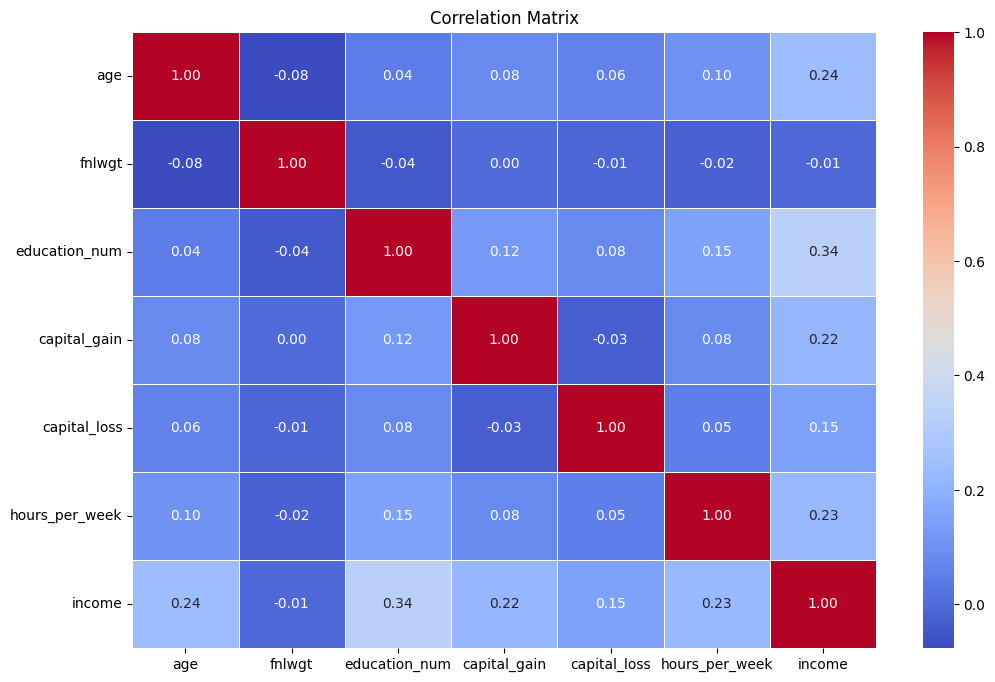

In [ ]:
# Plotting the correlation matrix using a heatmap
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

As evident from the preceding heatmap, correlations among the attributes "age", "fnlwgt", "education_num", "capital_gain", "capital_loss" and "hours_per_week" are nearly negligible.

However, when assessing the correlation with the "income" column, the three most positively correlated attributes, in descending order, are "education_num", "age" and "hours_per_week". Additionally, given that the correlation with "fnlwgt" could be considered null, this provides a compelling rationale for excluding it from further consideration.

*Note: Up to this point, we have not considered the "education" column in our analysis. This decision is based on the presence of the "education_num" column, which encapsulates the same information but with an ordered relationship. Consequently, utilizing "education_num" facilitates a more straightforward exploratory analysis. However, "education" will be the one considered in the Dashboard as it is more easily readable for our target audience.*

Let us now examine some of the correlations between the categorical features and the income column.

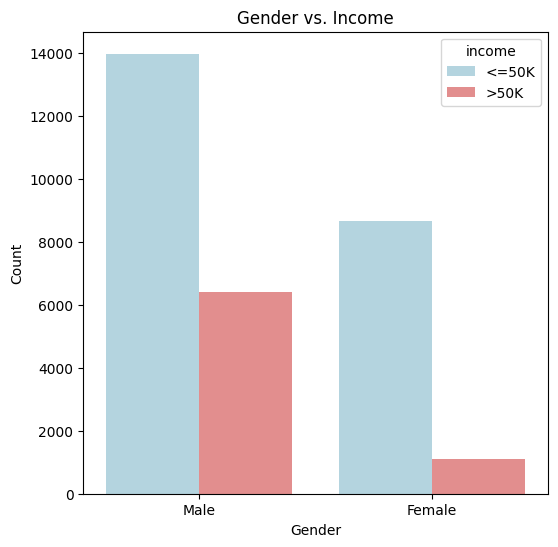

In [ ]:
df['income'] = df['income'].replace({0:'<=50K',1:'>50K'})

# Define a custom color palette with different colors
custom_palette = {"<=50K": "lightblue", ">50K": "lightcoral"}

# Gender and Income
plt.figure(figsize=(6, 6))
sns.countplot(x="sex", hue="income", data=df, palette=custom_palette)
plt.title("Gender vs. Income")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

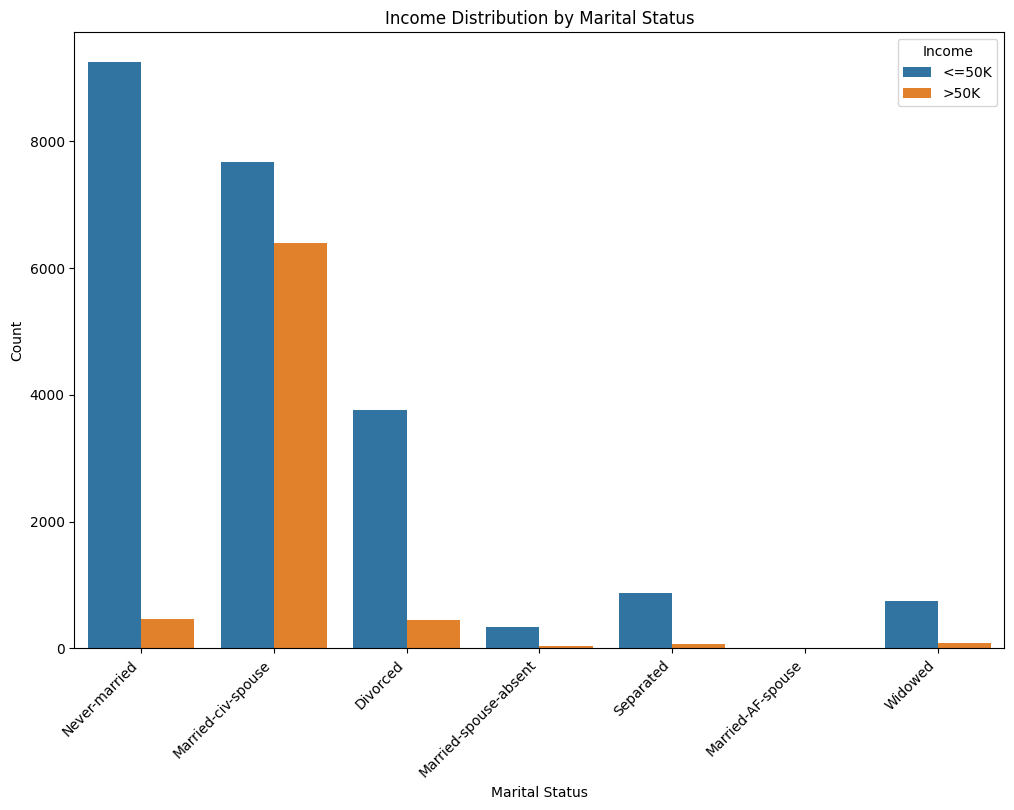

In [ ]:
# Create a bar plot for income distribution by marital status
plt.figure(figsize=(12, 8))
sns.countplot(x='marital_status', hue='income', data=df)
plt.title('Income Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Income', loc='upper right', labels=['<=50K', '>50K'])
plt.show()

 The plot, suggests that marital status may be associated with income levels, with "Married-civ-spouse" having a higher likelihood of higher incomes, while "Never-married" individuals are more prevalent in the lower income category.

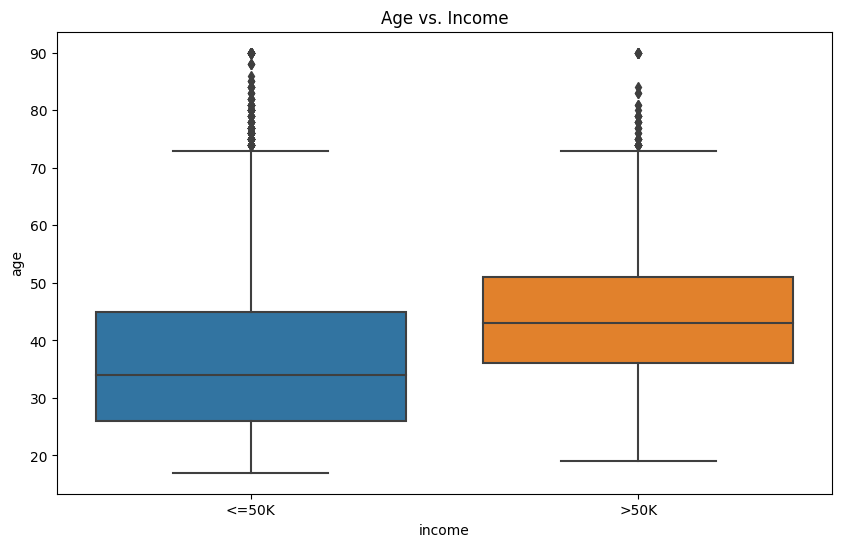

In [ ]:
# Age and Income
plt.figure(figsize=(10, 6))
sns.boxplot(x="income", y="age", data=df)
plt.title("Age vs. Income")
plt.show()

It clearly illustrates that, on average, older individuals tend to have higher incomes, as demonstrated by the higher box position for the ">50K" income category. The plot also highlights the presence of outliers, indicating individuals with incomes significantly different from the median. This visualization succinctly summarizes the income dynamics with respect to age and provides valuable insights into the dataset's income distribution.

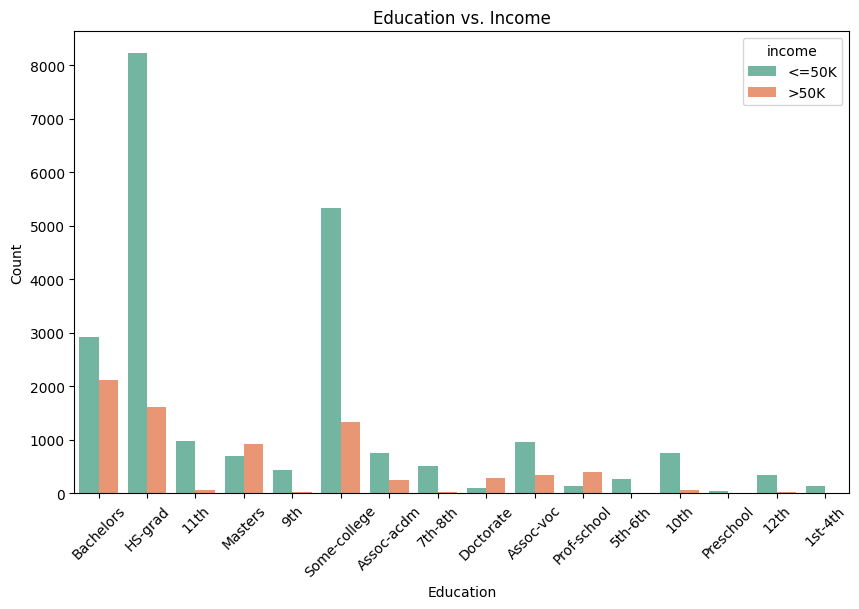

In [ ]:
# Education and Income
plt.figure(figsize=(10, 6))
sns.countplot(x="education", hue="income", data=df, palette="Set2")
plt.title("Education vs. Income")
plt.xticks(rotation=45)
plt.xlabel("Education")
plt.ylabel("Count")
plt.show()

It is evident that individuals with higher education levels, such as a bachelor's degree or higher, have a higher likelihood of earning ">50K," indicating a positive correlation between education and income, as we have proved numerically with the "education_num" column.

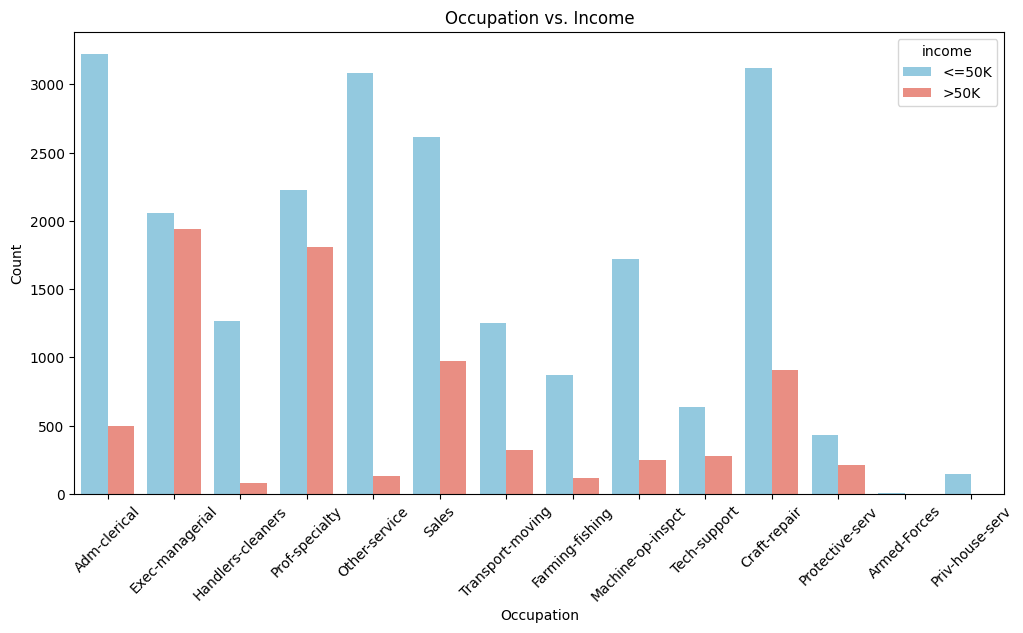

In [ ]:
# Occupation and Income
# Define a custom color palette
custom_palette = {"<=50K": "skyblue", ">50K": "salmon"}

# Occupation and Income
plt.figure(figsize=(12, 6))
sns.countplot(x="occupation", hue="income", data=df, palette=custom_palette)
plt.title("Occupation vs. Income")
plt.xticks(rotation=45)
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.show()

Notably, certain occupations, such as "Exec-managerial" and "Prof-specialty," tend to have a higher proportion of individuals earning ">50K," indicating the potential influence of occupation on income.

It's evident that the ">50K" income category is more prevalent among males, pointing to a gender-based income difference.

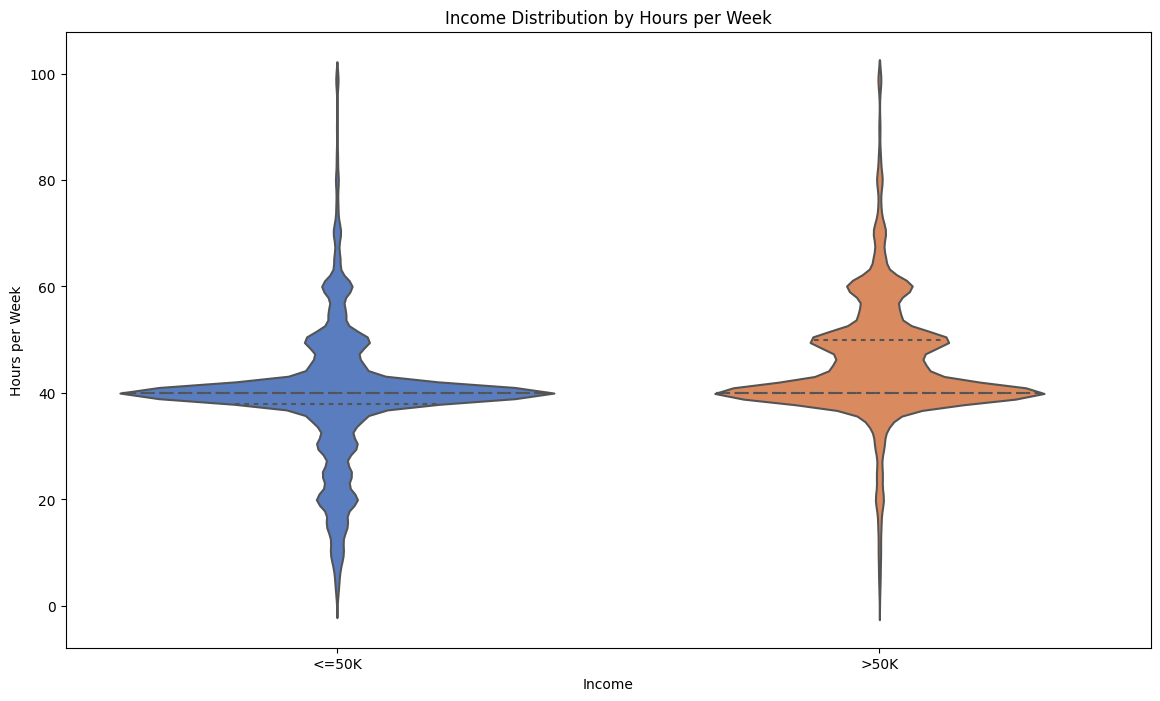

In [ ]:
# Create a violin plot for income distribution by hours per week
plt.figure(figsize=(14, 8))
sns.violinplot(x='income', y='hours_per_week', data=df, inner="quartile", palette="muted")
plt.title('Income Distribution by Hours per Week')
plt.xlabel('Income')
plt.ylabel('Hours per Week')
plt.show()

While there is a tendency for individuals with higher incomes to work more hours per week, the overlap and variability in the distributions indicate the importance of considering additional factors in predicting income.

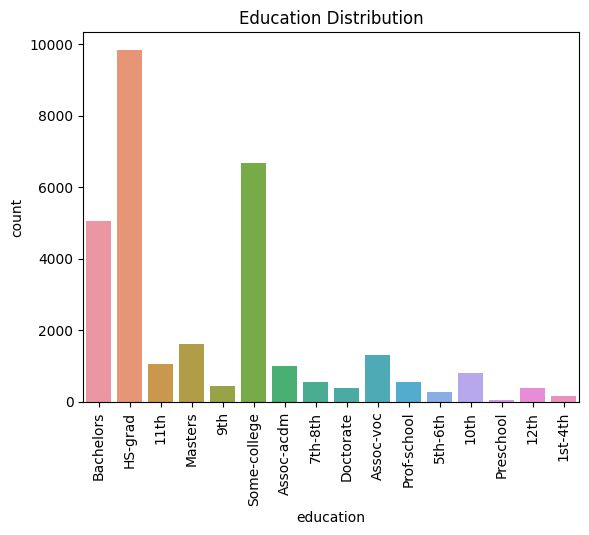

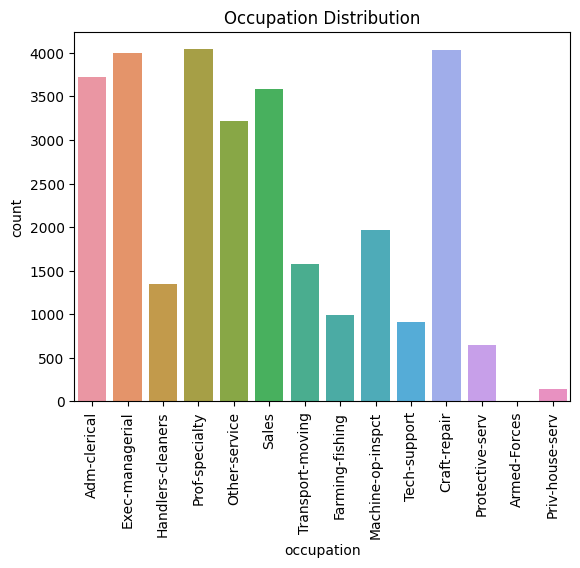

In [ ]:
#Understanting the distribution of individuals across different education levels and occupations in your dataset.
sns.countplot(x="education", data=df)
plt.title("Education Distribution")
plt.xticks(rotation=90)
plt.show()

sns.countplot(x="occupation", data=df)
plt.title("Occupation Distribution")
plt.xticks(rotation=90)
plt.show()


In conclusion, based on the observations thus far, we have chosen the following features "age", "sex", "education", "occupation", "marital_status", "native_country" as the demographic attributes to explain the column "income". These selected features are deemed relevant for providing insights into the income distribution within the dataset.